In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("flights_small.csv",sep=";")
df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,5,20,3,WN,2433,N638SW,BNA,LGA,1150,...,1919.0,259.0,0,0,NaN,1.0,0.0,38.0,220.0,0.0
1,2015,11,23,1,AA,2256,N481AA,DFW,IAH,1550,...,1643.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,24,2,B6,585,N355JB,ROC,JFK,1840,...,1947.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Correlaciones y asociaciones entre variables

In [2]:
del df["YEAR"]

In [3]:
df.corr(numeric_only = True).style.background_gradient("coolwarm")

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,1.000000,0.011763,0.001630,-0.020703,0.006765,0.002392,-0.010379,-0.015670,0.004612,0.028766,0.017218,0.018989,0.028273,-0.009176,0.005143,-0.014815,-0.006069,-0.030932,0.010586,-0.067954,-0.034754,0.035888,-0.015412,0.039858,0.018845
DAY,0.011763,1.000000,-0.015816,-0.004827,-0.001671,-0.002716,-0.005559,-0.006425,-0.004030,-0.002923,-0.008480,-0.006390,-0.003894,-0.001781,-0.022066,-0.004609,-0.003748,-0.012407,-0.003377,-0.012009,0.006435,0.008889,0.013475,0.021108,0.032018
DAY_OF_WEEK,0.001630,-0.015816,1.000000,0.012670,0.002675,-0.001022,-0.016826,-0.029074,-0.005916,0.024661,0.018707,0.022328,0.027998,0.008418,0.007279,0.006466,0.010862,-0.027004,0.003020,-0.032085,-0.038774,0.043708,0.012723,-0.032507,-0.025717
FLIGHT_NUMBER,-0.020703,-0.004827,0.012670,1.000000,-0.011856,-0.009758,-0.014016,0.047256,-0.001320,-0.323939,-0.314481,-0.326104,-0.337295,-0.012750,-0.023296,-0.012106,-0.008225,0.015760,-0.004872,0.039094,-0.030474,0.045433,0.015052,0.017475,-0.007587
SCHEDULED_DEPARTURE,0.006765,-0.001671,0.002675,-0.011856,1.000000,0.962650,0.127780,0.009213,0.928202,-0.008795,-0.010151,-0.008984,0.001001,0.644892,-0.034406,0.699432,0.624466,0.118545,0.008996,0.013503,-0.078029,-0.018061,-0.091809,0.165393,-0.018026
DEPARTURE_TIME,0.002392,-0.002716,-0.001022,-0.009758,0.962650,1.000000,0.167051,0.021409,0.964727,-0.010909,-0.010347,-0.011530,-0.003486,0.670505,-0.024409,0.697433,0.649784,0.156633,0.013422,-0.004453,-0.033727,-0.018768,-0.054366,0.147466,-0.010142
DEPARTURE_DELAY,-0.010379,-0.005559,-0.016826,-0.014016,0.127780,0.167051,1.000000,0.058829,0.158181,0.017474,0.023026,0.013506,0.013218,0.057524,0.031928,0.108667,0.052785,0.937681,0.035783,0.014044,0.026891,-0.019128,0.569805,0.660008,0.181953
TAXI_OUT,-0.015670,-0.006425,-0.029074,0.047256,0.009213,0.021409,0.058829,1.000000,0.048756,0.079606,0.180252,0.055151,0.044120,0.031728,0.007100,0.017620,0.030181,0.250697,0.020598,nan,0.463041,-0.010168,-0.069764,-0.126726,0.074554
WHEELS_OFF,0.004612,-0.004030,-0.005916,-0.001320,0.928202,0.964727,0.158181,0.048756,1.000000,-0.023815,-0.020823,-0.025837,-0.021027,0.694196,-0.023164,0.711575,0.673132,0.153967,0.015512,nan,-0.003487,-0.017787,-0.072055,0.120818,-0.002423
SCHEDULED_TIME,0.028766,-0.002923,0.024661,-0.323939,-0.008795,-0.010909,0.017474,0.079606,-0.023815,1.000000,0.983952,0.990659,0.984317,0.020703,0.079334,0.022627,0.017678,-0.046431,0.009012,-0.031544,0.040112,-0.007095,0.013761,-0.046700,-0.017804


In [4]:
df.corr(numeric_only=True)[['ARRIVAL_DELAY']].sort_values(by = "ARRIVAL_DELAY", ascending=False)

,ARRIVAL_DELAY
ARRIVAL_DELAY,1.000000
DEPARTURE_DELAY,0.937681
LATE_AIRCRAFT_DELAY,0.621045
AIRLINE_DELAY,0.555643
TAXI_OUT,0.250697
AIR_SYSTEM_DELAY,0.225432
WEATHER_DELAY,0.208060
DEPARTURE_TIME,0.156633
WHEELS_OFF,0.153967
TAXI_IN,0.140475


In [5]:
df[['MONTH', 'ARRIVAL_DELAY']].groupby('MONTH').mean().style.background_gradient()

,ARRIVAL_DELAY
MONTH,
1,6.434293
2,6.671920
3,3.582742
4,2.504316
5,4.087846
6,11.915877
7,8.708964
8,4.577088
9,-1.449184


In [6]:
pd.crosstab(df['DAY_OF_WEEK'], df['CANCELLED'], normalize='index').round(2)

CANCELLED,0,1
DAY_OF_WEEK,,
1,0.98,0.02
2,0.98,0.02
3,0.99,0.01
4,0.99,0.01
5,0.99,0.01
6,0.99,0.01
7,0.99,0.01


In [7]:
df['SALIDA_TARDE'] = df['DEPARTURE_DELAY'] > 15

In [8]:
pd.crosstab(df['AIRLINE'], df['SALIDA_TARDE'], normalize='index').round(2)

SALIDA_TARDE,False,True
AIRLINE,,
AA,0.83,0.17
AS,0.88,0.12
B6,0.79,0.21
DL,0.87,0.13
EV,0.83,0.17
F9,0.80,0.20
HA,0.93,0.07
MQ,0.80,0.20
NK,0.76,0.24


In [9]:
df.groupby('AIRLINE')[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']].mean()

,ARRIVAL_DELAY,DEPARTURE_DELAY
AIRLINE,,
AA,2.266379,8.256454
AS,0.487455,2.028571
B6,5.959184,10.448198
DL,-0.168164,7.126282
EV,6.702321,8.093467
F9,10.123377,10.103896
HA,7.076389,7.847222
MQ,10.897216,13.493590
NK,12.550000,13.725000


In [10]:
import numpy as np
from scipy.stats import chi2_contingency

tabla = pd.crosstab(df["DAY_OF_WEEK"], df["CANCELLED"])
tabla

CANCELLED,0,1
DAY_OF_WEEK,,
1,1472,37
2,1414,33
3,1446,20
4,1512,22
5,1425,16
6,1167,15
7,1402,19


In [11]:
chi2, p, dof, expected = chi2_contingency(tabla)
n = tabla.sum().sum()
min_dim = min(tabla.shape) - 1
v_cramer = np.sqrt(chi2 / (n * min_dim))

v_cramer

np.float64(0.03927471409409556)

# Estadística Inferencial básica

### Norma de oro

Confianza 95%

pvalor > 0.05     ->    Igualdad

pvalor < 0.05     ->    Diferencias

In [12]:
from scipy import stats

df_delay = df[['AIRLINE', 'ARRIVAL_DELAY']].dropna()

grupo_AA = df_delay[df_delay['AIRLINE'] == 'AA']['ARRIVAL_DELAY']
grupo_DL = df_delay[df_delay['AIRLINE'] == 'DL']['ARRIVAL_DELAY']

stats.ttest_ind(grupo_AA, grupo_DL, equal_var=False) #comparativo

TtestResult(statistic=np.float64(1.6748803069858094), pvalue=np.float64(0.09407313363235935), df=np.float64(2709.0879510155114))

In [21]:
stats.ttest_1samp(grupo_AA, popmean=0) # mu = 0

TtestResult(statistic=np.float64(2.319888897490487), pvalue=np.float64(0.020519919629133392), df=np.int64(1159))

In [22]:
media = grupo_AA.mean()
desviacion = grupo_AA.std()
n = len(grupo_AA)
stats.norm.interval(0.95, loc=media, scale=desviacion / np.sqrt(n))

(np.float64(0.35162303542679485), np.float64(4.181135585262861))

In [23]:
stats.shapiro(grupo_AA.sample(500)) # normalidad (NO normal)

ShapiroResult(statistic=np.float64(0.6762726442683493), pvalue=np.float64(8.715049412741825e-30))

In [24]:
stats.mannwhitneyu(grupo_AA.sample(500), grupo_DL.sample(500), alternative='two-sided')

MannwhitneyuResult(statistic=np.float64(133373.5), pvalue=np.float64(0.06664572592961689))

In [26]:
df['CANCELADO'] = df['CANCELLED'] == 1
pd.crosstab(df['AIRLINE'], df['CANCELADO'])

tabla = pd.crosstab(df['AIRLINE'], df['CANCELADO'])
stats.chi2_contingency(tabla).pvalue

np.float64(1.5532040055429531e-16)

# Análisis de datos extremos

In [19]:
df['ARRIVAL_DELAY'].describe()

count    9815.000000
mean        4.483647
std        38.777452
min       -63.000000
25%       -13.000000
50%        -5.000000
75%         8.000000
max      1048.000000
Name: ARRIVAL_DELAY, dtype: float64

<Axes: >

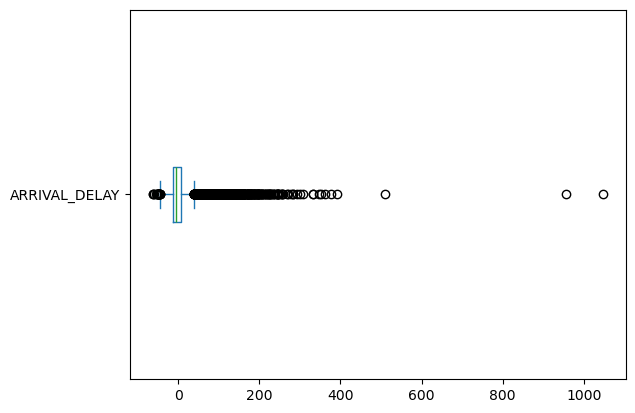

In [20]:
df['ARRIVAL_DELAY'].plot(kind='box', vert=False)

In [21]:
q1 = df['ARRIVAL_DELAY'].quantile(0.25)
q3 = df['ARRIVAL_DELAY'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 3 * iqr
limite_superior = q3 + 3 * iqr

df_extremos = df[(df['ARRIVAL_DELAY'] < limite_inferior) | (df['ARRIVAL_DELAY'] > limite_superior)]

df_extremos[['AIRLINE', 'ARRIVAL_DELAY']].sort_values('ARRIVAL_DELAY').head()

,AIRLINE,ARRIVAL_DELAY
8696,OO,72.0
8050,EV,72.0
1613,WN,72.0
6945,B6,73.0
5436,WN,73.0


In [22]:
df_extremos.groupby("AIRLINE")["ARRIVAL_DELAY"].describe()

,count,mean,std,min,25%,50%,75%,max
AIRLINE,,,,,,,,
AA,51.0,120.176471,47.378352,73.0,82.50,105.0,145.50,292.0
AS,7.0,102.428571,33.906033,74.0,77.00,90.0,115.50,168.0
B6,23.0,130.086957,54.353149,73.0,88.50,110.0,162.50,268.0
DL,59.0,148.440678,134.794514,76.0,90.00,108.0,160.00,1048.0
EV,59.0,126.677966,55.352924,72.0,93.00,116.0,142.00,392.0
F9,8.0,140.250000,56.380721,84.0,101.50,128.0,160.75,257.0
HA,3.0,423.000000,465.261217,105.0,156.00,207.0,582.00,957.0
MQ,37.0,151.513514,95.837716,74.0,88.00,118.0,154.00,511.0
NK,14.0,132.928571,59.393686,73.0,93.25,113.5,158.75,246.0


<Axes: >

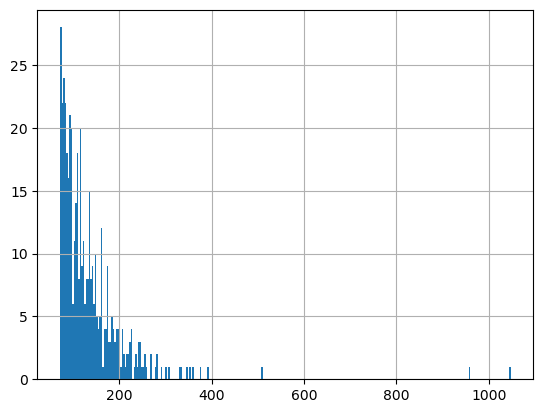

In [23]:
df_extremos['ARRIVAL_DELAY'].hist(bins=300)

In [24]:
df_filtrado = df[df['ARRIVAL_DELAY'] < 300]

<Axes: >

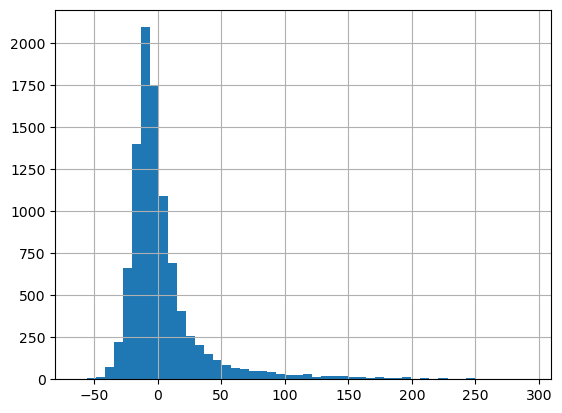

In [25]:
df_filtrado['ARRIVAL_DELAY'].hist(bins=50)

# Bases de datos relacionales

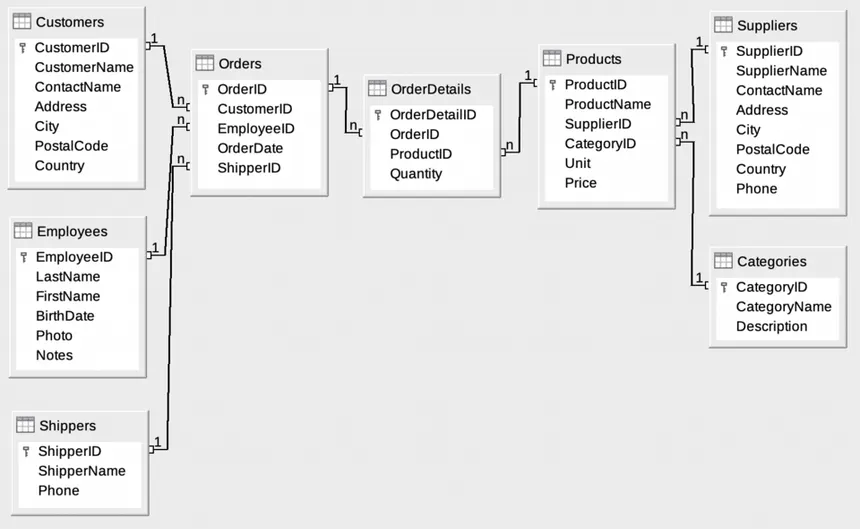

In [26]:
import sqlite3

conn = sqlite3.connect(":memory:")

df[[ 'MONTH', 'DAY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLED','ARRIVAL_DELAY']].to_sql('flights', conn, index=False)

consulta = """
SELECT AIRLINE, AVG(ARRIVAL_DELAY) as media_retraso
FROM flights
WHERE CANCELLED = 0
GROUP BY AIRLINE
ORDER BY media_retraso DESC
"""

In [27]:
pd.read_sql_query(consulta, conn)

,AIRLINE,media_retraso
0,NK,12.550000
1,MQ,10.897216
2,F9,10.123377
3,VX,8.504762
4,HA,7.076389
5,EV,6.702321
6,B6,5.959184
7,UA,5.342760
8,WN,5.296403
9,OO,4.613569


In [28]:
query2 = """
SELECT ORIGIN_AIRPORT, COUNT(*) as total_vuelos
FROM flights
GROUP BY ORIGIN_AIRPORT
HAVING total_vuelos > 100
ORDER BY total_vuelos DESC
"""

pd.read_sql_query(query2, conn)

,ORIGIN_AIRPORT,total_vuelos
0,ATL,609
1,ORD,487
2,DFW,428
3,LAX,326
4,DEN,307
5,PHX,265
6,SFO,264
7,IAH,250
8,LAS,230
9,MSP,207


In [29]:
query3 = """
SELECT *
FROM flights
WHERE ARRIVAL_DELAY > 180
"""

pd.read_sql_query(query3, conn).head()

,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLED,ARRIVAL_DELAY
0,5,20,WN,BNA,LGA,0,259.0
1,7,15,UA,EWR,SFO,0,228.0
2,6,18,EV,EWR,MEM,0,236.0
3,12,22,AA,JAC,ORD,0,207.0
4,11,19,VX,LGA,DAL,0,226.0


# Juntar tablas en Pandas

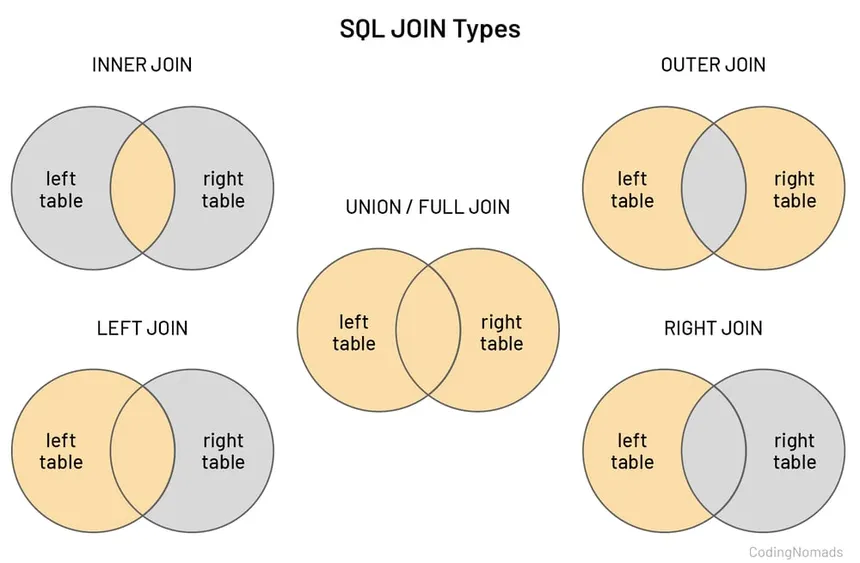

In [30]:
df_origen = df.groupby("ORIGIN_AIRPORT")[['DISTANCE']].mean()
print(df_origen.shape)
df_origen.tail()

(433, 1)


,DISTANCE
ORIGIN_AIRPORT,
VEL,132.000000
VLD,208.000000
VPS,401.428571
XNA,498.476190
YUM,160.000000


In [31]:
df_info = df.groupby("ORIGIN_AIRPORT")[["FLIGHT_NUMBER"]].count()
df_info = df_info[df_info["FLIGHT_NUMBER"] > 50].rename(columns = {"FLIGHT_NUMBER" : "RECUENTO"})
print(df_info.shape)
df_info.head()

(44, 1)


,RECUENTO
ORIGIN_AIRPORT,
10397,53
ATL,609
AUS,78
BNA,73
BOS,174


In [32]:
df_merge = pd.merge(df_info, df_origen, on='ORIGIN_AIRPORT', how = "right",)
df_merge

,RECUENTO,DISTANCE
ORIGIN_AIRPORT,,
10135,NaN,673.500000
10140,NaN,531.000000
10146,NaN,145.000000
10158,NaN,913.000000
10185,NaN,190.000000
...,...,...
VEL,NaN,132.000000
VLD,NaN,208.000000
VPS,NaN,401.428571


In [33]:
df1 = df[['AIRLINE', 'DEPARTURE_DELAY']].head(5)
df2 = df[['AIRLINE', 'DEPARTURE_DELAY']].tail(5)

pd.concat([df1, df2],)

,AIRLINE,DEPARTURE_DELAY
0,WN,258.0
1,AA,-3.0
2,B6,-9.0
3,OO,-10.0
4,DL,-6.0
9995,US,-9.0
9996,DL,-3.0
9997,EV,0.0
9998,WN,35.0
9999,EV,-4.0


In [34]:
pd.concat([df1, df2], ignore_index=True)

,AIRLINE,DEPARTURE_DELAY
0,WN,258.0
1,AA,-3.0
2,B6,-9.0
3,OO,-10.0
4,DL,-6.0
5,US,-9.0
6,DL,-3.0
7,EV,0.0
8,WN,35.0
9,EV,-4.0


# Bucles y paralelización

In [35]:
for i in range(5):
    print("Iteración: " + str(i))

Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4


In [36]:
lista = ['AA', 'DL', 'UA']
for aerolinea in lista:
    retraso = df[df['AIRLINE'] == aerolinea]['ARRIVAL_DELAY'].mean()
    print(aerolinea + ": " + str(round(retraso, 2)))

AA: 2.27
DL: -0.17
UA: 5.34


In [37]:
resultados = []
for origen in df['ORIGIN_AIRPORT'].unique()[:5]:
    media = df[df['ORIGIN_AIRPORT'] == origen]['DEPARTURE_DELAY'].mean()
    resultados.append((origen, media))

resultados

[('BNA', np.float64(21.333333333333332)),
 ('DFW', np.float64(10.102380952380953)),
 ('ROC', np.float64(12.470588235294118)),
 ('11193', np.float64(-6.333333333333333)),
 ('SLC', np.float64(7.172839506172839))]

In [38]:
from joblib import Parallel, delayed

def media_retraso(origen):
    return origen, df[df['ORIGIN_AIRPORT'] == origen]['DEPARTURE_DELAY'].mean()

origenes = df['ORIGIN_AIRPORT'].unique()[:10]

In [39]:
resultados_paralelo = Parallel(n_jobs=2)(delayed(media_retraso)(o) for o in origenes)

print(resultados_paralelo)

[('BNA', np.float64(21.333333333333332)), ('DFW', np.float64(10.102380952380953)), ('ROC', np.float64(12.470588235294118)), ('11193', np.float64(-6.333333333333333)), ('SLC', np.float64(7.172839506172839)), ('TPA', np.float64(10.672566371681416)), ('PHX', np.float64(7.823076923076923)), ('SFO', np.float64(17.038314176245212)), ('DAL', np.float64(17.947916666666668)), ('LAS', np.float64(8.878260869565217))]


# Automatización de analítica con DataFrames

In [40]:
def limpiar_df(data):
    data = data.dropna(subset=['DEPARTURE_TIME', 'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY'])
    data = data[data['CANCELLED'] == 0]
    return data

In [41]:
def clasificar_hora(hora):
    if hora < 600:
        return 'Madrugada'
    elif hora < 1200:
        return 'Mañana'
    elif hora < 1800:
        return 'Tarde'
    else:
        return 'Noche'

In [42]:
def crear_columnas(data):
    data['RETRASO_TOTAL'] = data['DEPARTURE_DELAY'] + data['ARRIVAL_DELAY']
    data['SALIDA_TARDE'] = data['DEPARTURE_DELAY'] > 15
    data['CATEGORIA_VUELO'] = data['DISTANCE'].apply(lambda x: 'Corto' if x < 500 else 'Largo')
    data['FRANJA_HORARIA'] = data['SCHEDULED_DEPARTURE'].apply(clasificar_hora)
    return data

In [43]:
def generar_resumen(data):
    resumen = data.groupby(['AIRLINE', 'CATEGORIA_VUELO']).agg({
        'RETRASO_TOTAL': 'mean',
        'SALIDA_TARDE': 'mean',
        'DISTANCE': 'mean'
    }).round(2)
    resumen = resumen.rename(columns={
        'RETRASO_TOTAL': 'Media_retraso',
        'SALIDA_TARDE': 'Porc_salidas_tarde',
        'DISTANCE': 'Distancia_media'
    })
    return resumen

In [44]:
def guardar_csv(df_resumen, nombre_archivo):
    df_resumen.to_csv(nombre_archivo)

In [45]:
def pipeline_completo(data):
    data = limpiar_df(data)
    data = crear_columnas(data)
    resumen = generar_resumen(data)
    guardar_csv(resumen, "resumen_retrasos.csv")
    return resumen

In [46]:
resumen_final = pipeline_completo(df.sample(1000))
resumen_final.head()

Media_retraso  Porc_salidas_tarde  Distancia_media
AIRLINE CATEGORIA_VUELO                                                    
AA      Corto                    24.75                0.31           259.19
        Largo                     6.47                0.17          1166.55
AS      Corto                     5.00                0.00           166.50
        Largo                     7.84                0.26          1252.84
B6      Corto                    -0.23                0.15           297.69